In [88]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [89]:
train = pd.read_csv('drive/MyDrive/GoogleStockPrice/Google_Stock_Price_Train.csv')
test = pd.read_csv('drive/MyDrive/GoogleStockPrice/Google_Stock_Price_Test.csv')

In [90]:
model = keras.Sequential()

In [91]:
model.add(keras.layers.LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(keras.layers.Dropout(0.2))

In [92]:
model.add(keras.layers.LSTM(50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))

In [93]:
model.add(keras.layers.LSTM(50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))

In [94]:
model.add(keras.layers.LSTM(50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))

In [95]:
model.add(keras.layers.LSTM(50))
model.add(keras.layers.Dropout(0.2))

In [96]:
model.add(keras.layers.Dense(1))

In [97]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [98]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [99]:
train = train['Open']

In [100]:
train = np.array(train).reshape(-1, 1)

In [101]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [102]:
scaler.fit(X=train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [103]:
train = scaler.transform(train)

In [104]:
X_train = []
y_train = []

In [105]:
for i in range(60, len(train)):
  X_train.append(train[i - 60:i])
  y_train.append(train[i])
# TimeStep = 60

In [106]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [107]:
model.fit(x=X_train, y=y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 [==============================] - 12s 136ms/step - loss: 0.1039
Epoch 2/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0066
Epoch 4/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0064
Epoch 5/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0062
Epoch 6/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0060
Epoch 8/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0067
Epoch 10/100
38/38 [==============================] - 5s 145ms/step - loss: 0.0054
Epoch 11/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0049
Epoch 13/100

In [108]:
points_for_predict = train[len(train) - 60:len(train)]

In [109]:
for i in range(len(points_for_predict) - 60, len(points_for_predict)):
  predicted = model.predict(x=points_for_predict[i : len(points_for_predict)].reshape(1, 60, 1))
  points_for_predict = np.append(points_for_predict, predicted)

In [110]:
points_for_predict = scaler.inverse_transform(points_for_predict.reshape(-1, 1))

In [111]:
X_test = test.loc[:, 'Date']
y_test = test.loc[:, 'Open']

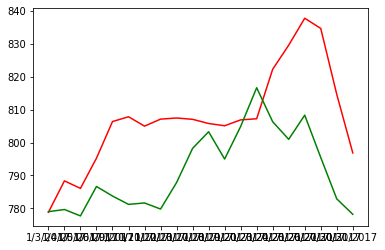

In [112]:
plt.plot(X_test, y_test, 'r')
plt.plot(points_for_predict[len(points_for_predict) - 60:], 'g')
plt.show()